ANDRE OFSOSKI 1314669
REECE BREEBAART 1314828

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

['housing.csv']


# Part 1

In [2]:
# store data in variable
df = pd.read_csv('../input/housing.csv')
# fill blank entries
df = df.fillna(0)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
# change categorical coloumns to numerical values
#ocean_proximity= {"NEAR BAY":1, "<1H OCEAN":2, "INLAND":3, "NEAR OCEAN":4, "ISLAND":5}
#df.ocean_proximity=[ocean_proximity[item] for item in df.ocean_proximity]

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
data_kat=df[['ocean_proximity']]
kat_encoder= OneHotEncoder()
data_kat_1hot=kat_encoder.fit_transform(data_kat)
print(data_kat_1hot.toarray())

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
data1=df.drop('median_house_value',axis=1)
num_attrs=list(data1)
num_attrs.remove("ocean_proximity")
cat_attrs=["ocean_proximity"]
full_pipeline = ColumnTransformer([("num",SimpleImputer(strategy='median'),num_attrs),("cat",OneHotEncoder(),cat_attrs)])
x=full_pipeline.fit_transform(data1)
print(x)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


In [6]:
from sklearn.model_selection import train_test_split
y=df.iloc[:,9]
X_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1314669)
X_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15/0.8,random_state=1314669)
print(X_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)
X_train.shape[0]/x.shape[0]

(16770, 13) (16770,)
(3870, 13) (3870,)
(4128, 13) (4128,)


0.8125

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit(X_train)
X_valid_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
#model = keras.models.Sequential()
#model.add(keras.layers.Dense(300,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
#model.add(keras.layers.Dense(30,activation="relu"))
#model.add(keras.layers.Dense(10,activation="relu"))

#model.compile(loss="mean_squared_error", optimizer = "adam")
#history= model.fit(X_train,y_train,epochs=30, validation_data=(X_val,y_val))
#mse_test = model.evaluate(X_test,y_test)
#X_new = X_test[:3]
#y_pred = model.predict(X_new)


mae_value=[]
average_value=[]
layer_value=[1,2,4,8]
size_value=[10,30,100,300]

def find_keras(num_layers,size,check=False):
    model = keras.models.Sequential()
    if num_layers == 1:
        model.add(keras.layers.Dense(size,input_dim=13,activation="relu"))
        model.add(keras.layers.Dense(1))
    elif num_layers==2:
        model.add(keras.layers.Dense(size,input_dim=13,activation="relu"))
        model.add(keras.layers.Dense(size,activation="relu"))
        model.add(keras.layers.Dense(1))
    elif num_layers==4:
        model.add(keras.layers.Dense(size,input_dim=13,activation="relu"))
        model.add(keras.layers.Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(1))
    elif num_layers==8:
        model.add(Dense(size,input_dim=13,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(size,activation="relu"))
        model.add(Dense(1))
        
    model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
    mFit = model.fit(X_train,y_train,validation_data=(x_val,y_val),epochs=30)
    plt.plot(mFit.history['val_mean_absolute_error'])
    mae_value.append(mFit.history['val_mean_absolute_error'])
    average_value.append(np.mean(mae_value))
    plt.show()
    model.summary()

    if(check==True):
        count = 0
        totalCount = 0
        prediction = model.predict(x_test)
        for i in range(len(x_test)):
            totalCount+=1
            if prediction[i] < 1500 or prediction[i] > 500000:
                count+=1
    print(str(count)+ "out of" + str(totalCount))
    print(mFit.history['mean_absolute_error'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 16770 samples, validate on 3870 samples
Epoch 1/30
16770/16770 [==============================] - 6s 376us/step - loss: 14809200730.4930 - mean_absolute_error: 90743.7746 - val_loss: 9768964214.5406 - val_mean_absolute_error: 76654.4469
Epoch 2/30
16770/16770 [==============================] - 3s 173us/step - loss: 9091133765.3200 - mean_absolute_error: 73881.1775 - val_loss: 9909131109.4739 - val_mean_absolute_error: 76447.3836
Epoch 3/30
16770/16770 [==============================] - 3s 178us/step - loss: 7542175473.4369 - mean_absolute_error: 66490.5402 - val_loss: 8432067371.7912 - val_mean_absolute_error: 66722.8204
Epoch 4/30
16770/16770 [==============================] - 3s 176us/step - loss: 6285926174.5612 - mean_absolute_error: 59501.6216 - val_loss: 5033265195.6589 - val_mean_absolute_error: 52729.1341
Epoch 5/30
16770/16770 [======================

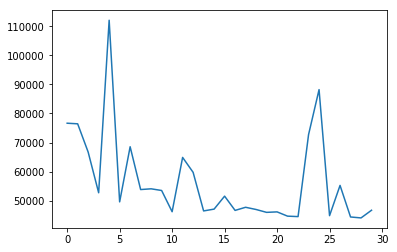

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               4200      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
__________

In [9]:
import operator
# We looped through all possible combos to find the best scores
#for i in layer_value:
   #for s in size_value:
        #find_keras(i,s,True)
# 8 and 300 produced the best scores        
find_keras(8,300,True)
index, value = min(enumerate(average_value), key=operator.itemgetter(1))
print("Minimum value: "+str(value)+" index: "+str(index))

1. Our minimum value mae was 52546.15584477283
2. 64* out of 4128 have predictions outside [15000,500000] (* the value will change)
3. This mae is worse than the ones given in lab 3 as it is a higher value, ie the lowest mae we calculated in lab 3 was 40717.18241840805 (using ridge regressor).

# Part 2

In [10]:
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.layers import Flatten
from keras.optimizers import SGD

(X_train, y_train), (x_test, y_test) = cifar10.load_data()
y_test = keras.utils.to_categorical(y_test,10)
y_train = keras.utils.to_categorical(y_train,10)


170500096/170498071 [==============================] - 2s 0us/step


In [11]:
X_train = X_train /255
x_test = x_test / 255
x_test.shape

(10000, 32, 32, 3)

In [12]:
X_train.shape

(50000, 32, 32, 3)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                62730     
___________________________

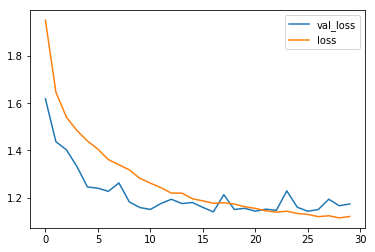

[1.1762253286361695, 0.5918]


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.summary()
sgd = SGD(lr = 0.01, decay = 1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

mFit= model.fit(X_train,y_train,batch_size=32,epochs=30,verbose=2,validation_split=0.15)
plt.plot(mFit.history['val_loss'])
plt.plot(mFit.history['loss'])
plt.legend(['val_loss', 'loss'])
plt.show()

score = model.evaluate(x_test, y_test, batch_size=128, verbose=0)
print(score)

## Best learning rate:
LR = 0.01: Val_acc = 0.6252

0.92643905 3 [1.09494606e-04 9.82964630e-05 9.95294075e-04 9.26439047e-01
 9.57856610e-05 1.64892860e-02 2.83534918e-03 2.23577430e-04
 4.99815196e-02 2.73246458e-03]


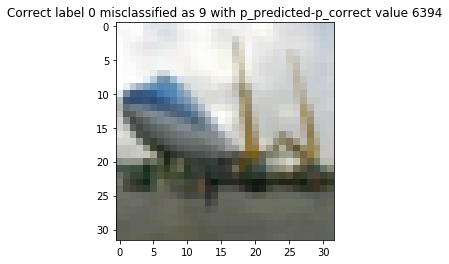

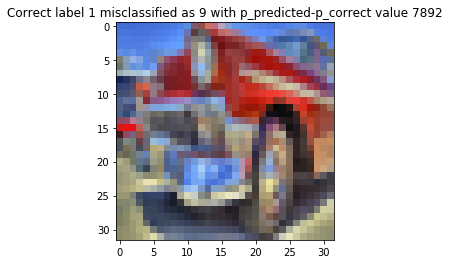

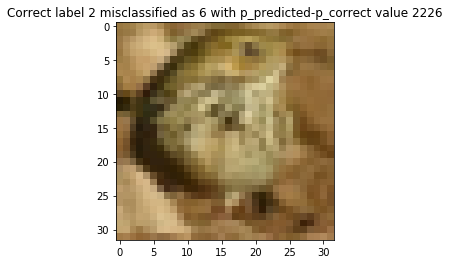

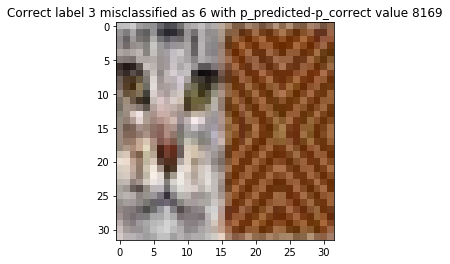

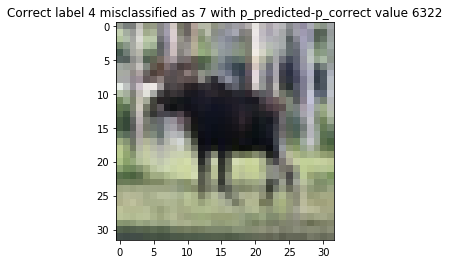

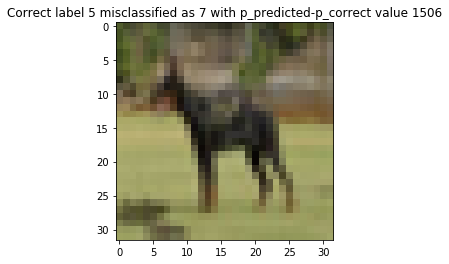

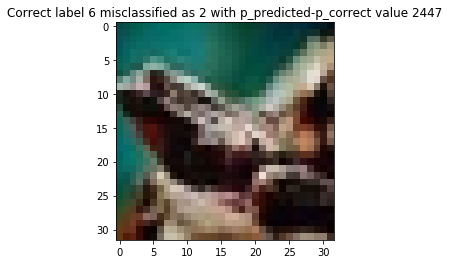

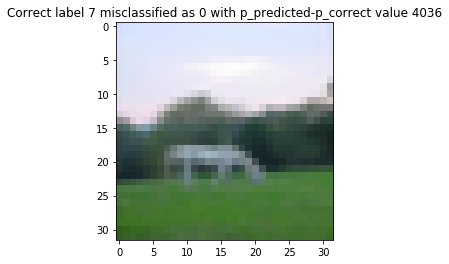

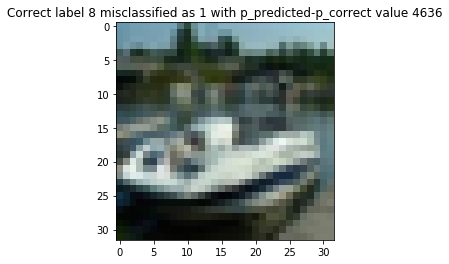

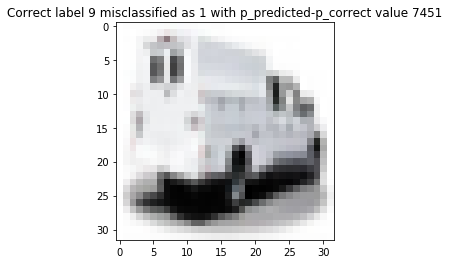

In [14]:
import matplotlib.pyplot as plt

#find misclassified
def fm(c, labels, preds):
    worst = 0
    worst_index = -1
    
    for i in range(len(preds)):
        if labels[i][c]==1:
            if np.max(preds[i]) > preds[i][c]:
                diff = np.max(preds[i]) - preds[i][c]
                if worst < diff:
                    worst = diff
                    worst_index = i
    return worst_index

predictions = model.predict(x_test)
print(np.max(predictions[0]), np.argmax(predictions[0]), predictions[0])

for i in range(10):
    idx = fm(i, y_test, predictions)
    max = fm(i, y_test, predictions)
    display = x_test[idx].reshape(32,32,3)
    plt.imshow(x_test[idx:][0])
    plt.title("Correct label " + str(i) + " misclassified as " + str(np.argmax(predictions[idx])) + " with p_predicted-p_correct value " + str(max))
    plt.show()